<a href="https://colab.research.google.com/github/ktichola/Image-matching/blob/main/Understanding_FlannMatcher_(cv2)%2C_LightGlue%2C_Dino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'image-matching-challenge-2024:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F71885%2F8143495%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240514%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240514T064411Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D58058bcc9f8ba72e9a4dd3e52f36e729b4243a55f437f8fa060cd8c39a30ec3c72b21a0935ccab41c68b8a1cb5cceba76f464e5703fa36137806570356f0f6ba3af6d364f005307ba0569c33647a1f8ae4347331d7ce904a7ce39327e3cb0e1b84882e875f03fba0d887966d67315f85a450f090699a11c04c5352d8e9296e55caa45143de7335ae156678f100d029e124b78888be2450547aefaa4e909230cd0c36e35e5c937dd5af6081a9e7924112f6055f0fc77f2fc62c993eb7a58b90415ce2b749012336fec937e38b1481d0c8b809dc455eb155b5b1120fd31c7dfa3ec9a906c9876053a770851b84785c4d6af4b138916aa6ae442a933af231818679,imc2024-packages-lightglue-rerun-kornia:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4628051%2F7884485%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240514%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240514T064411Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D417b24a15b15085178f100d573842c5047704bda352cf2da007d1551d6983a3774383910badc441339ab90801de389012b21e244ecd4844ff00b09f06866d0b24c28fa36660292a16e0703552a669c3b58d8061852b2d25c4e1c83a7510db247e6c997b4c1b6c62bb85dcaac1844cb42ae49b5cb6d949fc26bf1bbe14cde571a8a2f66c2b7ec10a59650e38be2b5c02d3fd19defc46835f6a44ce499a899da10e97b31a3835f5a36836294f3e64884abe8a768c98cc4fd3de36802437a9653a7933ae76d70435979f881a1811937f25d6e1dceb5fe8b248543c698577a4f504a39521eb209ecc395abe513cb65a8df32bf4ac1f5196ead2195a5af96061ef4a3,colmap-db-import:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4628331%2F7884725%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240514%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240514T064412Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D64f3d274f5a2a93fb493be3c2f49ab867a702ce13bfe3b7d606b4f8c0d6993154e187b13f4bd1ac394f814331995678d02d313c4ef21bddaf6df314ea64ad87d6ad8ea6a8884b6ac335e4d7e8f913e32df9747b7d294c2a0fdde97146ea38db3436f93c56c805a45f630f48756b99e744da291be2ddfe8192c06a0de23f78e80769b5ba5b95adf350f40a2839e33985a33602161db18dadc25a8e400770cd00a77fece0490fe6b3f9eb5edd298aaf832fed23cbd92c800f5df56c61312991e53414a0185f5ce3abf644fee330134ae2bb528e6e34fbdb8095acb08ed460dea8cbc60b185bea39bd74c1d43159b40dd464490d0301aa1c1b05364c17a74a36fac,lightglue/pytorch/aliked/1:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F14317%2F17191%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240514%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240514T064412Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D251ef3cebcfb225a364d87506f8253fc71d50a53e1d68c02dda42541b4604510621c1e7239af079edd057f5b507871d3bc4dbd8a2dae6112ad345a870433af3a932f506f2f39caed4975499d34ba8f4a5d0d250fd3d6bd559a2f8764bf7d971e4bc1b859ac9a2958b8a2049bfef1499ccb480eb15f7b955bb008d3ec68fab0ae8dddbef18b2fe802f5cc73799d881223c128ffb334154ad4f490f16193631e1983caf92be3295eede3e7213227821a1ede05d4c1575c1167fd354e2e17c30362bf727e17802d8e1239070323e31323e1167265f18459e629126f9043b160e174877a8776547992ad364836257f79d6ea9361bf4205bae8b38423f686103fa0b9,aliked/pytorch/aliked-n16/1:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F14611%2F17555%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240514%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240514T064412Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D29f444a58f69fcd7b5d48e60825fc2eb25b24de28e9be47f27cf9d5d4cfeaef8d70eebb74e51dda807a289cb633c1fa3ef333e1afd308950496d4c3db73a0dd1b6168a6756de5f7732585ce49a4354d1f4d14ae12b24d41327705a47e256ba7006915063a44cc462d68853dfdd87e49bc627a504d342b561b39207f151e83884c1552b57029676980974d465bfa2144b03baadd5d0ab544cf0d25cd65df006ca5092f6f8983cc5b4ef9d31e8bd51de75ca62fd677939c53ad4f84d86634673a91da4762ad910780169709fba6729b3866237c05b0828b3bbc0e996ea6a5561b42fd3ada44f50f155d3756fbbc0b2dadf3fbefa3aa8f4d83a2e7e059cffc975ed'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
im_path1 = '/kaggle/input/image-matching-challenge-2024/train/church/images/00001.png'
im_path2 = '/kaggle/input/image-matching-challenge-2024/train/church/images/00020.png'
im_path3 = '/kaggle/input/image-matching-challenge-2024/train/church/images/00030.png'
img1 = cv2.imread(im_path1)
img2 = cv2.imread(im_path2)
img3 = cv2.imread(im_path3)

# Flann Based Matcher

In [ ]:
def flannMatcher_opencv(img1, img2):
    # Initiate SIFT detector
    sift = cv2.SIFT_create()

    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)

    # FLANN parameters
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50) # or pass empty dictionary

    flann = cv2.FlannBasedMatcher(index_params,search_params)

    matches = flann.knnMatch(des1,des2,k=2)

    # Need to draw only good matches, so create a mask
    matchesMask = [[0,0] for i in range(len(matches))]

    # ratio test as per Lowe's paper
    for i,(m,n) in enumerate(matches):
        if m.distance < 0.7*n.distance:
            matchesMask[i]=[1,0]

    draw_params = dict(matchColor = (0,255,0),
                    singlePointColor = (255,0,0),
                    matchesMask = matchesMask,
                    flags = cv2.DrawMatchesFlags_DEFAULT)

    img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

    plt.figure(figsize = (10,5))
    plt.imshow(img3,),plt.show()

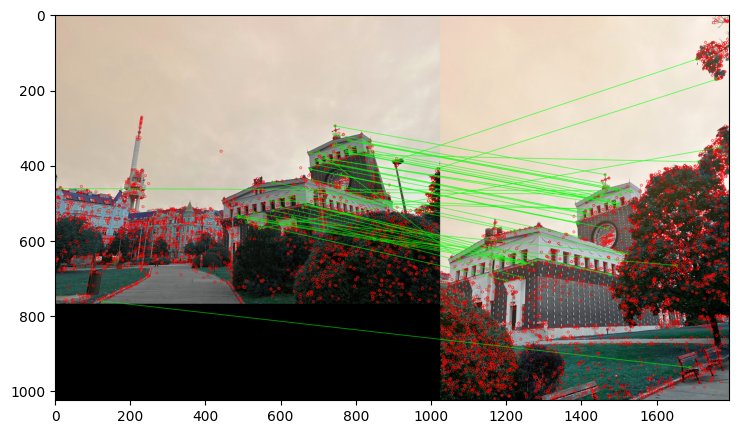

In [ ]:
flannMatcher_opencv(img1, img2)

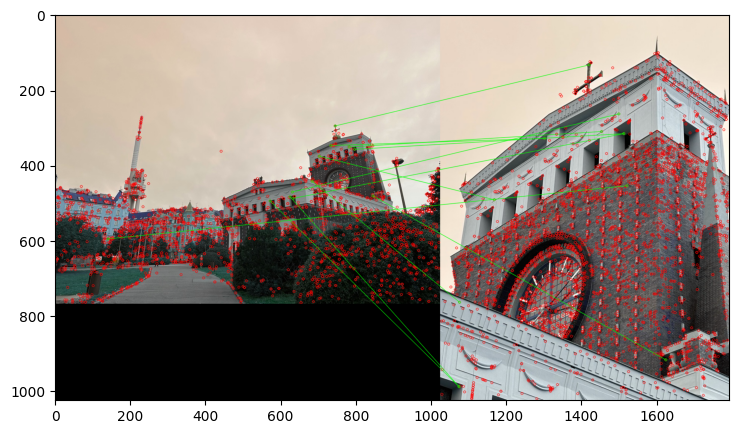

In [ ]:
flannMatcher_opencv(img1, img3)

# LightGlue

In [ ]:
### Uncomment and run the bottom two lines to install LightGlue!
### Restart kernel ("Run" -> "Restart & clear cell outputs") after installation!

!git clone https://github.com/cvg/LightGlue.git
!python -m pip install -e LightGlue/

Cloning into 'LightGlue'...
remote: Enumerating objects: 382, done.
remote: Counting objects: 100% (203/203), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 382 (delta 143), reused 87 (delta 82), pack-reused 179
Receiving objects: 100% (382/382), 17.42 MiB | 20.27 MiB/s, done.
Resolving deltas: 100% (235/235), done.
Obtaining file:///kaggle/working/LightGlue
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for lightglue (pyproject.toml) ... done
  Created wheel for lightglue: filename=lightglue-0.0-0.editable-py3-none-any.whl size=14508 sha256=8170d90df98b7fe0acbaa189cd7c1cac3b48ed39ae707d3fa904932b2ad2eeb4
  Stored in directory: /tmp/pip-ephem-wheel-cache-777jp_81/wheels/ce/cb/6d/dd1cd0ff8b071d2ae4abfb493141e65634e1c0be5b46cc451c
Successfully built lightglue


In [ ]:
import torch
from LightGlue.lightglue import viz2d
from LightGlue.lightglue import LightGlue, SuperPoint, DISK
from LightGlue.lightglue.utils import numpy_image_to_torch, rbd

In [ ]:
class cfg:
    lightglue = {
        "extractor": "SuperPoint", # SuperPoint, DISK
        "device": "cpu", # cpu, cuda
        "max_kpts": 2048,
        "homography": {
            "method": cv2.RANSAC,
            "ransacReprojThreshold": 3.0
        }
    }


In [ ]:
def preprocess_lightglue(img):
    img = numpy_image_to_torch(img)
    return img


def match_lightglue(img0, img1, cfg):
    img0 = preprocess_lightglue(img0)
    img1 = preprocess_lightglue(img1)

    if cfg["extractor"] == "SuperPoint":
        extractor = SuperPoint(max_num_keypoints=cfg["max_kpts"]).eval().to(cfg["device"])
        matcher = LightGlue(features='superpoint').eval().to(cfg["device"])

    if cfg["extractor"] == "DISK":
        extractor = DISK(max_num_keypoints=cfg["max_kpts"]).eval().to(cfg["device"])  # load the extractor
        matcher = LightGlue(features='disk').eval().to(cfg["device"])  # load the matcher

    # extract local features
    feats0 = extractor.extract(img0)  # auto-resize the image, disable with resize=None
    feats1 = extractor.extract(img1)

    # match the features
    matches01 = matcher({'image0': feats0, 'image1': feats1})
    feats0, feats1, matches01 = [rbd(x) for x in [feats0, feats1, matches01]]  # remove batch dimension

    # get results
    kpts0 = feats0["keypoints"]
    kpts1 = feats1["keypoints"]
    matches = matches01['matches']  # indices with shape (K,2)
    points0 = kpts0[matches[..., 0]]  # coordinates in img0, shape (K,2)
    points1 = kpts1[matches[..., 1]]  # coordinates in img1, shape (K,2)

    return {
        "points0": points0,
        "points1": points1,
        "matches01": matches01,
        "matches": matches,
        "kpts0": kpts0,
        "kpts1": kpts1,
        "img0": img0,
        "img1": img1
    }


def visualize_lightglue(img0, img1, points0, points1, kpts0, kpts1, matches01, plt_key=True, rotation=0, **kwargs, ):
    axes = viz2d.plot_images([img0, img1],dpi=70)
    viz2d.plot_matches(points0, points1, color='lime', lw=0.2)
#     viz2d.add_text(1, f'Stop after {matches01["stop"]} layers', fs=20)
    viz2d.add_text(0, f'Source', fs=20)
    viz2d.add_text(1, f'Dest.: Rotation {rotation} deg.', fs=20)

    if(plt_key):
        kpc0, kpc1 = viz2d.cm_prune(matches01['prune0']), viz2d.cm_prune(matches01['prune1'])
        viz2d.plot_images([img0, img1], dpi=70)
        viz2d.plot_keypoints([kpts0, kpts1], colors=[kpc0, kpc1], ps=10)

Downloading: "https://github.com/cvg/LightGlue/releases/download/v0.1_arxiv/superpoint_v1.pth" to /root/.cache/torch/hub/checkpoints/superpoint_v1.pth
100%|██████████| 4.96M/4.96M [00:00<00:00, 113MB/s]
Downloading: "https://github.com/cvg/LightGlue/releases/download/v0.1_arxiv/superpoint_lightglue.pth" to /root/.cache/torch/hub/checkpoints/superpoint_lightglue_v0-1_arxiv.pth
100%|██████████| 45.3M/45.3M [00:00<00:00, 223MB/s]


CPU times: user 12.3 s, sys: 3.01 s, total: 15.3 s
Wall time: 10.1 s


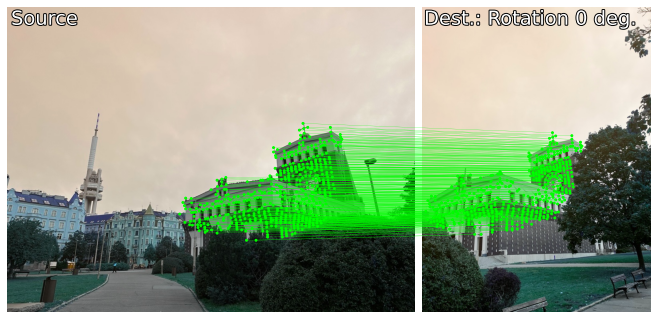

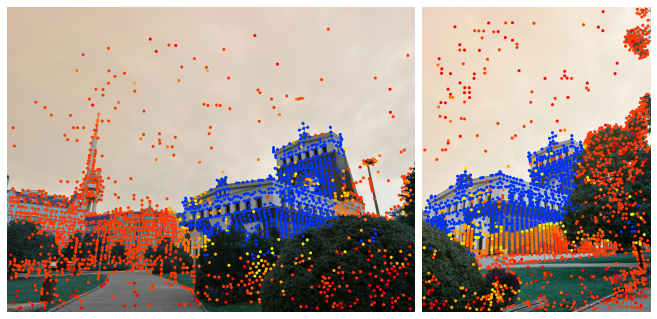

In [ ]:
# LightGlue
%time results_lightglue = match_lightglue(img1, img2, cfg.lightglue)
visualize_lightglue(**results_lightglue)

CPU times: user 12.4 s, sys: 2.99 s, total: 15.4 s
Wall time: 8.57 s


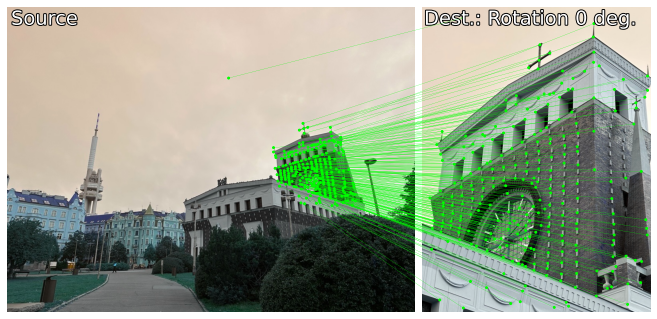

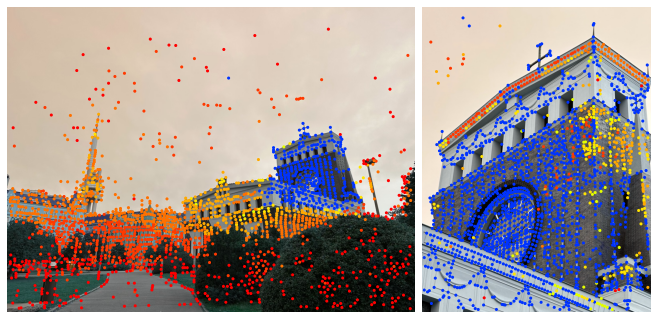

In [ ]:
# LightGlue
%time results_lightglue = match_lightglue(img1, img3, cfg.lightglue)
visualize_lightglue(**results_lightglue)

# Dino

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms as pth_transforms

In [ ]:
patch_size = 8
model = torch.hub.load('facebookresearch/dino:main', 'dino_vits16')

Downloading: "https://github.com/facebookresearch/dino/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://dl.fbaipublicfiles.com/dino/dino_deitsmall16_pretrain/dino_deitsmall16_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dino_deitsmall16_pretrain.pth
100%|██████████| 82.7M/82.7M [00:00<00:00, 114MB/s] 


In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

for p in model.parameters():
        p.requires_grad = False

model.eval()
model.to(device)

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 384, kernel_size=(16, 16), stride=(16, 16))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): ModuleList(
    (0-11): 12 x Block(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=384, out_features=1152, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=384, out_features=1536, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=1536, out_features=384, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (norm): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
  (head): Identity()
)

In [ ]:
def calculate_attention(image):
    transform = pth_transforms.Compose([
        pth_transforms.ToTensor(),
        pth_transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])
    img = transform(image)

    # make the image divisible by the patch size
    w, h = img.shape[1] - img.shape[1] % patch_size, img.shape[2] - img.shape[2] % patch_size
    img = img[:, :w, :h].unsqueeze(0)

    w_featmap = img.shape[-2] // patch_size
    h_featmap = img.shape[-1] // patch_size

    #attentions = model.forward_selfattention(img.to(device))
    attentions = model.get_last_selfattention(img)   #img.cuda()

    nh = attentions.shape[1] # number of head

    # we keep only the output patch attention
    attentions = attentions[0, :, 0, 1:].reshape(nh, -1)

    # we keep only a certain percentage of the mass
    val, idx = torch.sort(attentions)
    val /= torch.sum(val, dim=1, keepdim=True)
    cumval = torch.cumsum(val, dim=1)

    threshold = 0.6 # We visualize masks obtained by thresholding the self-attention maps to keep xx% of the mass.
    th_attn = cumval > (1 - threshold)
    idx2 = torch.argsort(idx)
    for head in range(nh):
        th_attn[head] = th_attn[head][idx2[head]]

    th_attn = th_attn.reshape(nh, w_featmap//2, h_featmap//2).float()

    # interpolate
    th_attn = nn.functional.interpolate(th_attn.unsqueeze(0), scale_factor=patch_size, mode="nearest")[0].cpu().numpy()

    attentions = attentions.reshape(nh, w_featmap//2, h_featmap//2)
    attentions = nn.functional.interpolate(attentions.unsqueeze(0), scale_factor=patch_size, mode="nearest")[0].cpu().numpy()
    attentions_mean = np.mean(attentions, axis=0)
    return attentions_mean

In [ ]:
def visualize_Dino(image, attentions_mean):
    plt.figure(figsize=(6,6), dpi=150)

    plt.subplot(1,2,1)
    plt.title("Original",size=6)
    plt.imshow(image)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title("Attentions Mean",size=6)
    plt.imshow(attentions_mean)
    plt.axis("off")


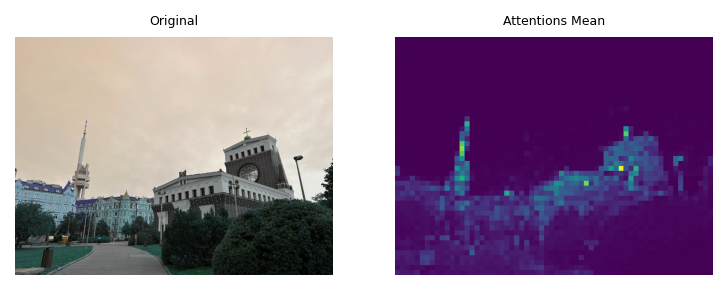

In [ ]:
attentions_mean = calculate_attention(img1)
visualize_Dino(img1, attentions_mean)

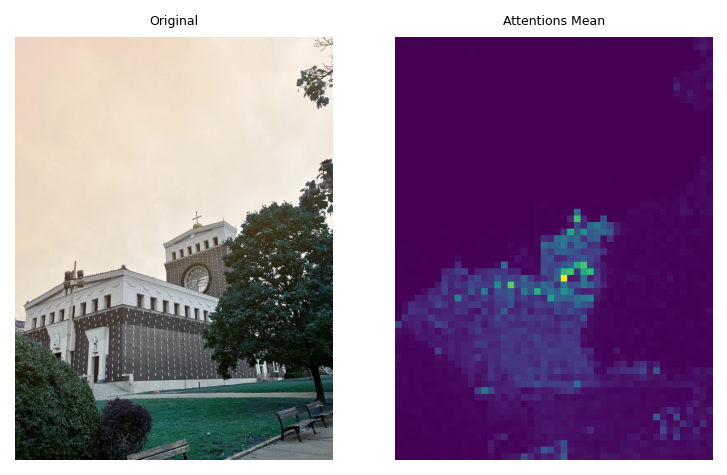

In [ ]:
attentions_mean = calculate_attention(img2)
visualize_Dino(img2, attentions_mean)

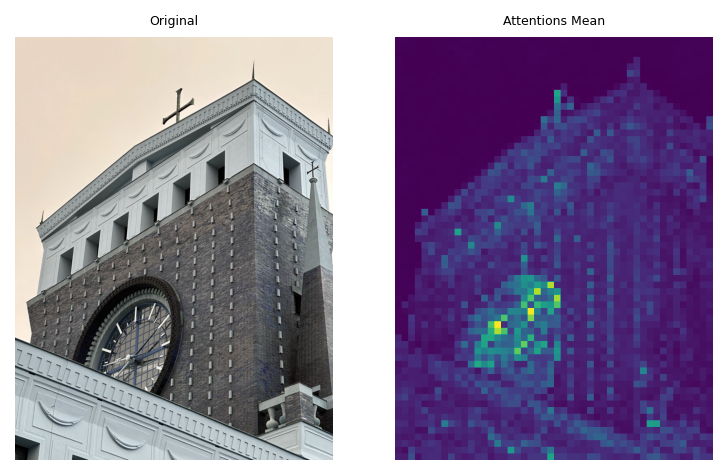

In [ ]:
attentions_mean = calculate_attention(img3)
visualize_Dino(img3, attentions_mean)

# Finding good matches by rotation

In [ ]:
from matplotlib.patches import Circle

In [ ]:
img_path1 = '/kaggle/input/image-matching-challenge-2024/train/dioscuri/images/3dom_fbk_img_1512.png'
img_path2 = '/kaggle/input/image-matching-challenge-2024/train/dioscuri/images/img_0281.png'
img_path3 = '/kaggle/input/image-matching-challenge-2024/train/dioscuri/images/img_0107.png'
im1 = cv2.imread(img_path1)
im2 = cv2.imread(img_path2)
im3 = cv2.imread(img_path3)

In [ ]:
def rotate(image, angle:int):
    num_rotate = int(angle/90)
    for i in range(num_rotate):
        image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    return image

In [ ]:
def viz_rotated(img0, img1):
    for i in range(4):
        angle = i*90
        img_rotate = rotate(img1, angle)
        results_lightglue = match_lightglue(img0, img_rotate, cfg.lightglue)
        visualize_lightglue(**results_lightglue, plt_key=False, rotation=angle)
        print(f'Number of matched keypoints (for {angle} degrees rotation): ', len(results_lightglue['matches01']['matches']))

Number of matched keypoints (for 0 degrees rotation):  53
Number of matched keypoints (for 90 degrees rotation):  22
Number of matched keypoints (for 180 degrees rotation):  76
Number of matched keypoints (for 270 degrees rotation):  14


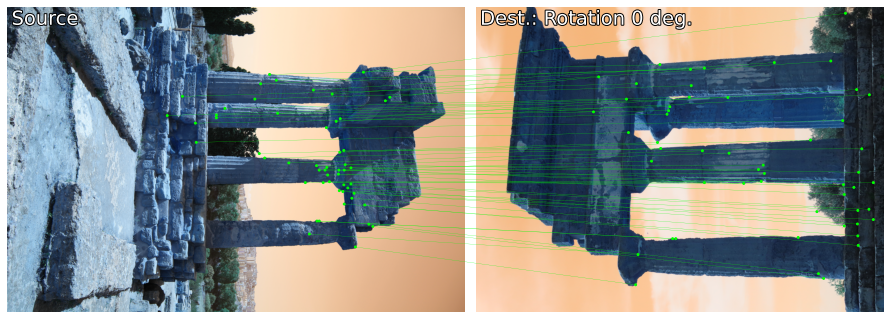

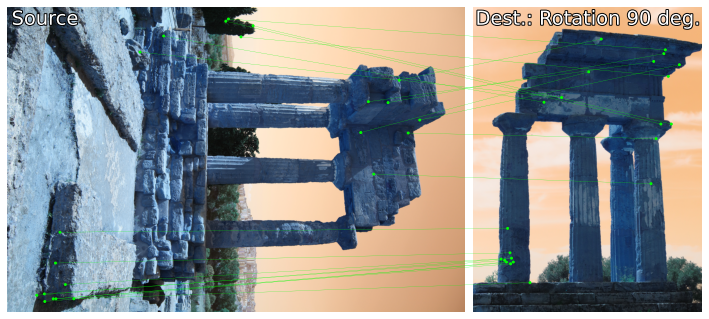

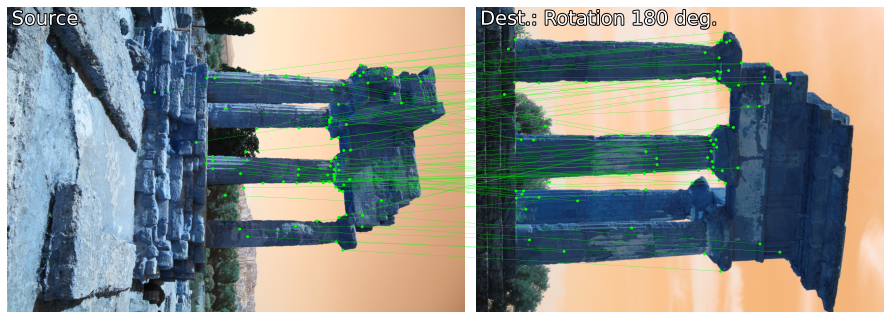

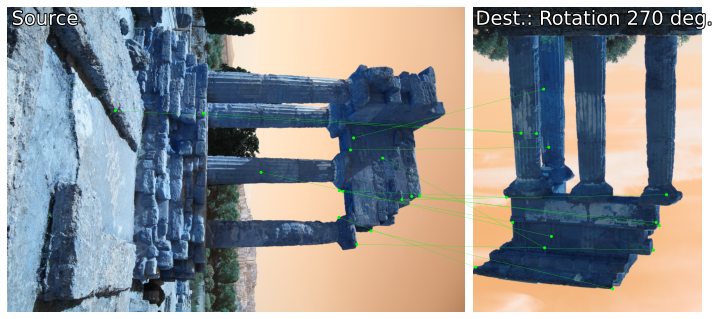

In [ ]:
viz_rotated(im1, im3)

# Analyze the coordinate changes

In [ ]:
w = im3.shape[1]/2
h = im3.shape[0]/2
w,h

(512.0, 384.0)

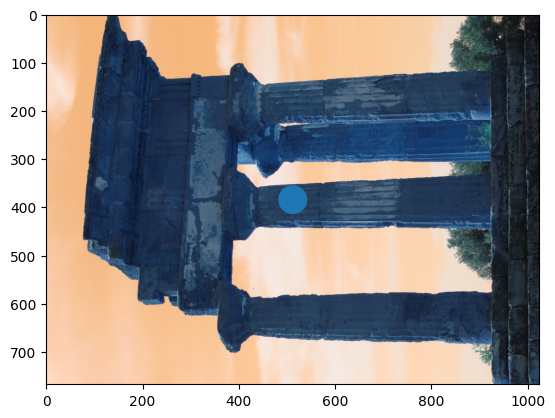

In [ ]:
fig,ax = plt.subplots(1)
circ = Circle((w,h),30)
ax.add_patch(circ)
plt.imshow(im3)

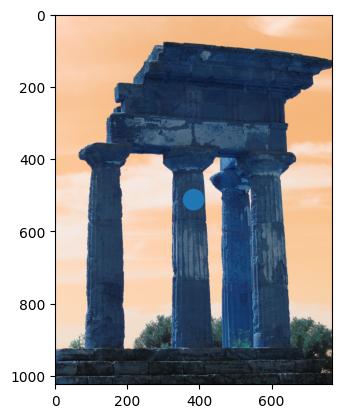

In [ ]:
rotated = cv2.rotate(im3, cv2.ROTATE_90_CLOCKWISE)
fig,ax = plt.subplots(1)
circ = Circle((h,w),30)
ax.add_patch(circ)
plt.imshow(rotated)

# References
- https://www.kaggle.com/code/asarvazyan/imc-understanding-the-baseline
- https://www.kaggle.com/code/raffelsbem98/image-matching-with-opencv-and-lightglue
- https://www.kaggle.com/code/stpeteishii/dino-visualize-self-attention-sample